# Homework 4

Maksim Nikiforov

## Part 1 - Summarizing student data

### Task 1 - Read in the data

In [84]:
import pandas as pd

# Read data locally and specify semicolon as delimiter
math_data = pd.read_csv("student-mat.csv", delimiter=';')

### Task 2 - Summarize the data

#### Categorical variables

In [58]:
# Convert some of the categorical variables into category type variables
math_data.school = math_data.school.astype("category")
math_data.sex = math_data.sex.astype("category")
math_data.address = math_data.address.astype("category")
math_data.Pstatus = math_data.Pstatus.astype("category")
math_data.Medu = math_data.Medu.astype("category")
math_data.Fedu = math_data.Fedu.astype("category")
math_data.Mjob = math_data.Mjob.astype("category")
math_data.Fjob = math_data.Fjob.astype("category")
math_data.reason = math_data.reason.astype("category")
math_data.guardian = math_data.guardian.astype("category")
math_data.studytime = math_data.studytime.astype("category")
math_data.traveltime = math_data.traveltime.astype("category")
math_data.schoolsup = math_data.schoolsup.astype("category")
math_data.famsup = math_data.famsup.astype("category")
math_data.paid = math_data.paid.astype("category")
math_data.activities = math_data.activities.astype("category")
math_data.higher = math_data.higher.astype("category")
math_data.romantic = math_data.romantic.astype("category")
math_data.freetime = math_data.freetime.astype("category")
math_data.goout = math_data.goout.astype("category")
math_data.health = math_data.health.astype("category")
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [35]:
# Create a one-way contingency table
math_data.address.value_counts()

U    307
R     88
Name: address, dtype: int64

In this one-way contingency table, we see that most student in the data set - 307 - live live in an urban home. The remaining 88 students live in a rural home.

In [36]:
# Create a two-way contingency table
pd.crosstab(math_data.sex, math_data.higher, margins=True)

higher,no,yes,All
sex,,,
F,4,204,208
M,16,171,187
All,20,375,395


In this two-way contingency table, we see that the data includes information on 208 females and 187 males. Only 4 females and 16 males do not wish to pursue higher education.  

In [37]:
# Create a three-way contingency table
pd.crosstab(
    [math_data.guardian, math_data.famsup],
    math_data.sex,
    margins=True
)

sex                F    M  All
guardian famsup               
father   no       13   21   34
         yes      30   26   56
mother   no       46   61  107
         yes      99   67  166
other    no        7    5   12
         yes      13    7   20
All              208  187  395

The majority of students list "mother" as their guardian. In this subgroup, 99 females receive family educational support and 46 do not. The males are more evenly split; 67 males with "mother" as their guardian receive family educational support, and 61 do not. 

In [43]:
# Create a conditional two-way table by 
# subsetting the data (say with .loc) and then creating the two-way table

# Subset data with .loc to include only two columns: reason behind school choice and student's sex 
school_choice_reason = math_data.loc[:, ["reason", "sex"]] 

# Create the two-way table
pd.crosstab(school_choice_reason.reason, school_choice_reason.sex, margins=True)

sex,F,M,All
reason,,,
course,72,73,145
home,53,56,109
other,18,18,36
reputation,65,40,105
All,208,187,395


Here, we see that the majority of students (145) selected their school because of course preference, followed by proximity to home (109) and school reputation (105). 

In [59]:
# Create a conditional two-way table by 
# creating a three-way table and subsetting it

# Create the three-way contingency table
study_activities_tab = pd.crosstab(
    [math_data.studytime, math_data.activities],
    math_data.sex,
    margins=True
)

study_activities_tab

sex                     F    M  All
studytime activities               
1         no           16   43   59
          yes          11   35   46
2         no           64   31   95
          yes          49   54  103
3         no           24    5   29
          yes          27    9   36
4         no            8    3   11
          yes           9    7   16
All                   208  187  395

In [74]:
# Subset three-way table for females only to include 
# bivariate information on study time and participation in extracurricular activities
study_activities_tab.loc[:, "F"]

studytime  activities
1          no             16
           yes            11
2          no             64
           yes            49
3          no             24
           yes            27
4          no              8
           yes             9
All                      208
Name: F, dtype: int64

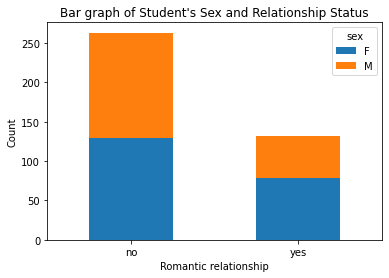

In [83]:
# Create a stacked bar graph. 
# Give relevant x and y labels, and a title for the plots.

# Import pyplot submodule
import matplotlib.pyplot as plt

table = pd.crosstab(math_data.romantic, math_data.sex)
table.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.xlabel("Romantic relationship")
plt.ylabel("Count")
plt.title("Bar graph of Student's Sex and Relationship Status")
plt.show()
plt.close()

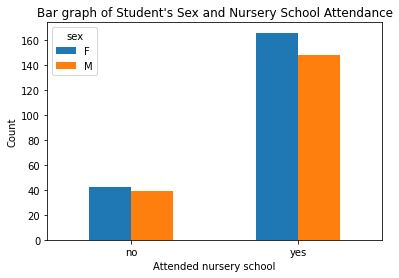

In [82]:
# Create a side-by-side bar graph. 
# Give relevant x and y labels, and a title for the plots.
table = pd.crosstab(math_data.nursery, math_data.sex)
table.plot.bar()
plt.xticks(rotation = 0)
plt.xlabel("Attended nursery school")
plt.ylabel("Count")
plt.title("Bar graph of Student's Sex and Nursery School Attendance")
plt.show()
plt.close()

#### Numeric variables (and across groups)